# Lennard-Jones fluid in Fortran

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

### This project in a nutshell

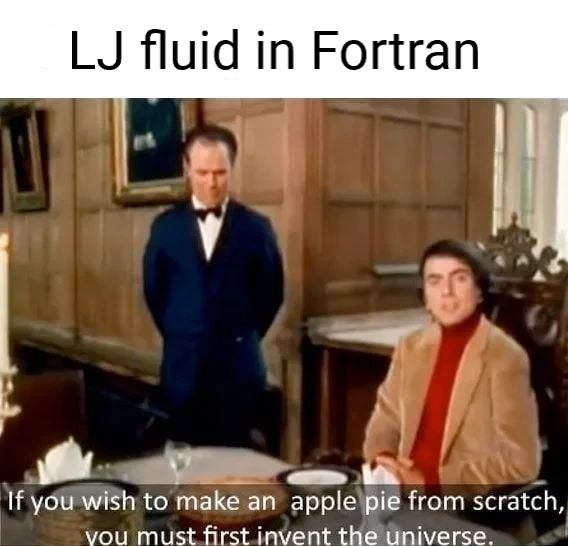

## The Lennard–Jones Potential
$$
V(x)=4 V_{0}\left\{\left(\frac{\sigma}{x}\right)^{12}-\left(\frac{\sigma}{x}\right)^{6}\right\}
$$
Subtitute $ L = \sigma $ and  $ v_{0}=2 m \sigma^{2} V_{0} / \hbar^{2} $
$$
v(x)=4 v_{0}\left\{\left(\frac{1}{x}\right)^{12}-\left(\frac{1}{x}\right)^{6}\right\}
$$

In [24]:
def V(x):
    V = 4.0*(1.0/x**12 - 1.0/x**6)
    return V

### Importing data from the file 'all.dat'

In [25]:
df_all = pd.read_table('all.dat', delim_whitespace=True,
                         names=['iter','energy','x','psi(i)','psip(i)'])
print(df_all.head(),'\n', df_all.tail())

   iter  energy        x        psi(i)       psip(i)
0     1   -71.0  0.70000 -4.748528e-19 -1.199591e-16
1     1   -71.0  0.70265 -9.245122e-19 -2.310352e-16
2     1   -71.0  0.70530 -1.780397e-18 -4.359784e-16
3     1   -71.0  0.70795 -3.380695e-18 -8.092509e-16
4     1   -71.0  0.71060 -6.326297e-18 -1.479418e-15 
        iter    energy        x        psi(i)       psip(i)
36013    18 -70.06875  5.98940  1.217573e-22 -1.024689e-21
36014    18 -70.06875  5.99205  1.190716e-22 -1.002338e-21
36015    18 -70.06875  5.99470  1.164444e-22 -9.804803e-22
36016    18 -70.06875  5.99735  1.138746e-22 -9.591047e-22
36017    18 -70.06875  6.00000  1.113608e-22 -9.382008e-22


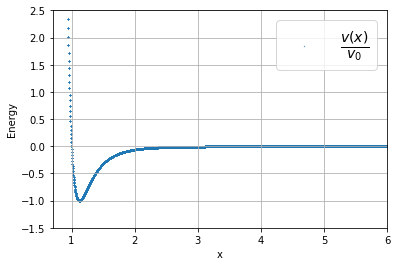

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)


ax.scatter(df_all['x'], V(df_all['x']), s = 0.1, label = '$\\frac{v(x)}{v_{0}}$')
ax.set_xlabel('x')
ax.set_ylabel('Energy')
plt.xlim(0.7,6)
plt.ylim(-1.5,2.5)
plt.legend(loc=1, prop={'size': 20})
plt.grid()
plt.show()

The eigenvalues $ \epsilon_{n} $ are related to the energy values $ E_{n} $ by
$$
\epsilon_{n}=4 v_{0}\left(\frac{E_{n}}{V_{0}}\right)
$$

### Chose 4 random iterations

In [27]:
print(df_all.loc[df_all['iter'] == 18])

df_iter1 = df_all.loc[df_all['iter'] == 1]
df_iter4 = df_all.loc[df_all['iter'] == 4]
df_iter8 = df_all.loc[df_all['iter'] == 8]
df_iter18 = df_all.loc[df_all['iter'] == 18]

       iter    energy        x        psi(i)       psip(i)
34017    18 -70.06875  0.70000 -3.427090e-19 -8.657642e-17
34018    18 -70.06875  0.70265 -6.672340e-19 -1.667406e-16
34019    18 -70.06875  0.70530 -1.284934e-18 -3.146484e-16
34020    18 -70.06875  0.70795 -2.439875e-18 -5.840384e-16
34021    18 -70.06875  0.71060 -4.565717e-18 -1.067694e-15
...     ...       ...      ...           ...           ...
36013    18 -70.06875  5.98940  1.217573e-22 -1.024689e-21
36014    18 -70.06875  5.99205  1.190716e-22 -1.002338e-21
36015    18 -70.06875  5.99470  1.164444e-22 -9.804803e-22
36016    18 -70.06875  5.99735  1.138746e-22 -9.591047e-22
36017    18 -70.06875  6.00000  1.113608e-22 -9.382008e-22

[2001 rows x 5 columns]


### Testing out the division function on dataframe

In [28]:
def div_v0(z):
    div = z/250.0
    return div
    
eps = df_iter1.loc[:, ['energy']]    
eps1dv0 = eps.apply(div_v0)
print(eps1dv0.head())

   energy
0  -0.284
1  -0.284
2  -0.284
3  -0.284
4  -0.284


### Printing energies

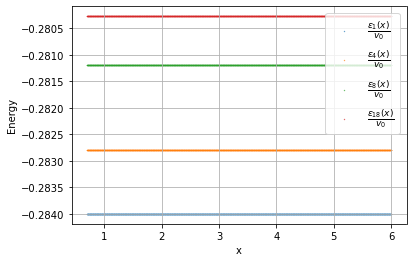

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

#ax.scatter(df_iter1['x'], df_iter1['energy'],  s = 0.1, label = '$\\epsilon_{1}(x)$')
ax.scatter(df_iter1['x'], eps1dv0,  s = 0.1, label = '$\\frac{\\epsilon_{1}(x)}{v_{0}}$')
ax.scatter(df_iter4['x'], df_iter4.loc[:, ['energy']].apply(div_v0), s = 0.1, label = '$\\frac{\\epsilon_{4}(x)}{v_{0}}$' )
ax.scatter(df_iter8['x'], df_iter8.loc[:, ['energy']].apply(div_v0), s = 0.1, label = '$\\frac{\\epsilon_{8}(x)}{v_{0}}$' )
ax.scatter(df_iter18['x'],df_iter18.loc[:,['energy']].apply(div_v0), s = 0.1, label = '$\\frac{\\epsilon_{18}(x)}{v_{0}}$')
ax.set_xlabel('x')
ax.set_ylabel('Energy')
#plt.xlim(0.7,3)
#plt.ylim(-0.9E-6, 1.1E-6)
plt.legend(loc=1, prop={'size': 13})
plt.grid()
plt.show()

### Plotting $ \psi(x) $ functions

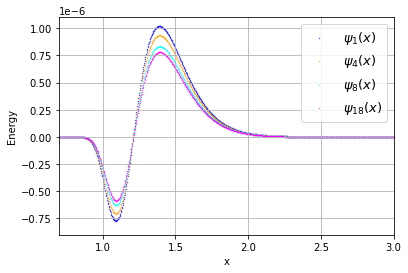

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df_iter1['x'], df_iter1['psi(i)'],  s = 0.1, color = 'blue',   label = '$\\psi_{1}(x)$')
ax.scatter(df_iter4['x'], df_iter4['psi(i)'],  s = 0.1, color = 'orange', label = '$\\psi_{4}(x)$')
ax.scatter(df_iter8['x'], df_iter8['psi(i)'],  s = 0.1, color = 'cyan',   label = '$\\psi_{8}(x)$')
ax.scatter(df_iter18['x'], df_iter18['psi(i)'],s = 0.1, color = 'magenta',label = '$\\psi_{18}(x)$')
ax.set_xlabel('x')
ax.set_ylabel('Energy')
plt.xlim(0.7,3)
plt.ylim(-0.9E-6, 1.1E-6)
plt.legend(loc=1, prop={'size': 13})
plt.grid()
plt.show()